Вопросы к данным:

1) Рассмотреть данные в разрезе соотношения террактов с суицидом и без: каких из них больше? как изменяются со временем?

2) В каких странах количество террактов наибольшее?

3) Где по миру расположены места террактов(отображение на карте)?

4) Где эффективнее всего предотвращались терракты?

5) Рассмотреть данные в разрезе типов террактов: террактов какого типа больше всего? в каких странах? сколько при этом в них террактов всего?

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns; 
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
import matplotlib.mlab as mlab
%matplotlib inline
sns.set(style="ticks", color_codes=True)
import datetime 

pd.set_option('display.max_columns', 5000)


In [2]:
df=pd.read_csv(r'/Users/mary/Desktop/Otus/HW2/globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1")

/Users/mary/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
eventid               int64
iyear                 int64
imonth                int64
iday                  int64
approxdate            object
extended              int64
resolution            object
country               int64
country_txt           object
region                int64
region_txt            object
provstate             object
city                  object
latitude              float64
longitude             float64
specificity           float64
vicinity              int64
location              object
summary               object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr             float64
alternative           float64
alternative_txt       object
multiple              float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt       object
attacktype2           floa

Посмотрим статистику террактов по признаку суицида (осуществлялся ли терракт с участием смертника или удаленно)

In [5]:
df=df[df['iday'] != 0]
df=df[df['imonth'] != 0]

In [6]:
df['idate']=pd.to_datetime(df[['iyear','imonth','iday']].rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'}))


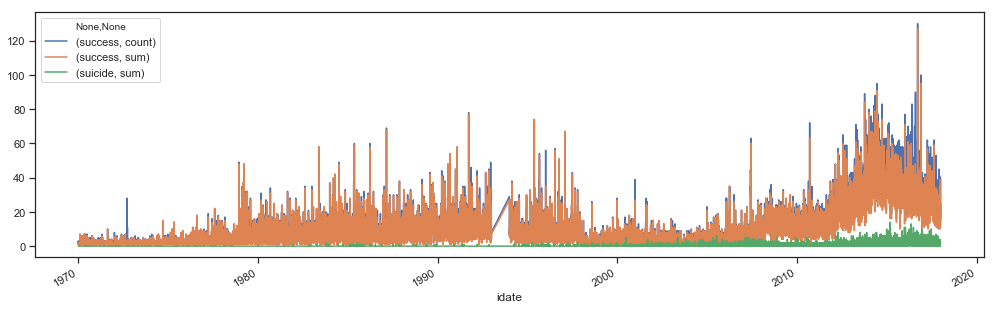

In [7]:
gb=df.groupby(['idate']).agg({'success':['count','sum'],'suicide':'sum'})
gb.plot(kind='line',figsize=(17,5))

plt.show()

In [8]:
df[df['idate'] == '2016-09-21 00:00:00'].groupby('region_txt').agg({'success':'sum','suicide':'sum'})

,success,suicide
region_txt,,
Middle East & North Africa,112,2
South Asia,8,0
Sub-Saharan Africa,5,1
Western Europe,2,0


In [9]:
df[df['idate'] == '2016-09-21 00:00:00'].groupby('country_txt').agg({'success':'sum','suicide':'sum'})

,success,suicide
country_txt,,
Afghanistan,2,0
Cameroon,1,1
Egypt,1,0
India,1,0
Iraq,106,2
Nigeria,1,0
Pakistan,5,0
Somalia,3,0
Syria,2,0


In [10]:
print(gb['success']['sum'].idxmax(),
      gb['success']['sum'].max(),
      gb['success']['sum'].mean()
     )

2016-09-21 00:00:00 127 10.007280647168637


В целом из графика видно, что количество террактов растет. Число суицидов при этом хоть и растет, но остается редкостью. 21 сентября 2016 года произошло максимальное число террактов за 1 день: 127, из которых 106 в Ираке. В среднем же в день совершается 10 террактов по всему миру.

Рассмотрим другие статистики

In [11]:
# Daily mean
df.groupby(['country_txt','idate'])[['success']].sum().groupby('country_txt').mean().sort_values('success'
                                                                                                 ,ascending=False)

,success
country_txt,
Iraq,4.786982
French Polynesia,3.000000
Afghanistan,2.909281
El Salvador,2.828151
Pakistan,2.791380
Ukraine,2.539867
Peru,2.514952
Chile,2.192079
Guadeloupe,2.043478


In [12]:
# Sum by country
df.groupby(['country_txt'])[['success']].sum().sort_values('success',ascending=False)

,success
country_txt,
Iraq,21843
Pakistan,12564
Afghanistan,11128
India,10254
Colombia,7639
Philippines,5942
Peru,5719
El Salvador,5184
United Kingdom,4186


In [13]:
# Sum by country in the last 10 years
century=df[df['iyear'] >= 2007]
century.groupby(['country_txt'])[['success']].sum().sort_values('success',ascending=False)

,success
country_txt,
Iraq,19871
Pakistan,10390
Afghanistan,10370
India,6285
Philippines,3689
Somalia,3602
Nigeria,3442
Thailand,2997
Yemen,2703


Лидер по количеству террактов в среднем за день, за последние 10 лет, а также по общему количеству террактов за весь период - Ирак. Пакистан и Афганистан также имеют высокие показатели
в сравнении за последние 10 лет.

1)как от месяца или дня зависит выбор регион/страна/provstate терракта ()
2)как распределены терракты по странам/регионам/provstate (где сколько всего, в среднем за месяц/год)
3)какова частота суицидников(
-неск графиков на одном: кол-во суицидников в день против несуиц. против общего; то же в мес и год (по миру)
-в разрезе стран;
-топ 5 стран с наибольшим кол-вом суицидников, несуицидников, в принципе террактов (в день/мес/год);
-процент стран, где не было суицидников вообще, либо только они;
-тепловая карта зависимости числа суицидников от региона;
-бокс плот по регионам;
определить распределение числа атак в год/месяц/день по миру, аналогично для суицидников и несуицидников), 
4)распределение суицидников по странам
5)распределение по странам количества террактов в день(макс/среднее)
6)в 5 странах с макс количеством террактов распределение по годам, месяцам и дням
7)точки террактов на карте

осн. цель: выявить зависимость между фактом атаки с суицидом и другими факторами, если таковая имеется
анализ как по миру, так и в разрезе стран и регионов

Почему такой подход?
На мой взгляд, если атака включает в себя суицид - она точно продиктована чистой верой в радикально трактуемую религию. Если же суицида не было и человек обезопасил себя, направив огонь на других - мы имеем дело с убийцами, которые руководствуются другими мотивами - отличными от религиозных, получают какую-то выгоду. Следовательно, вопрос о том, с чем или кем мы имеем дело, немного меняет ответ. 

Посмотрим где в принципе по миру сконцентрированы пики террористической активности, рассмотрим данные на карте

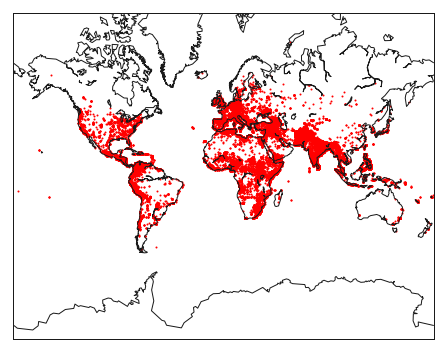

In [31]:
plt.figure(figsize=(12,6))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawmapboundary()
x, y = m(list(df["longitude"].astype(float)), list(df["latitude"].astype(float)))
m.scatter(x,y,1,marker='o',color='red')

plt.show()

Как видно из карты, террористические атаки осуществляются в большинстве своем в южной и западной частях Евразии, практически по всей Африке, также по западу и центру Южной Америки и югу Северной.

Отобразим распределение количества террактов по годам

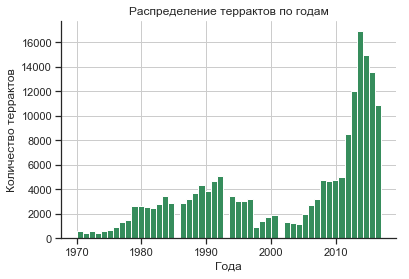

In [156]:
clmn = df['iyear']
fig, ax= plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(clmn,50, facecolor='#368d5c')

plt.xlabel('Года')
plt.ylabel('Количество террактов')
plt.title(r'Распределение террактов по годам')
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

Из графика видно, что после 2010 года количество террактов стало резко увеличиваться. Посмотрим, в каких именно местах терракты имели место до и после 2010 на карте

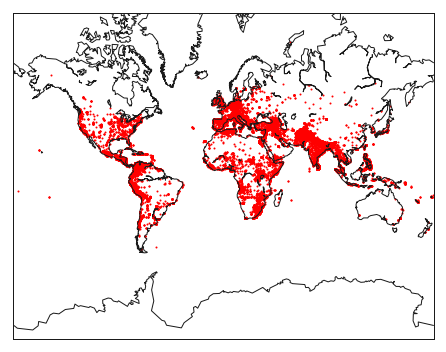

In [292]:
df2010=df[df['iyear'] >= 2010]
df2009=df[df['iyear'] < 2010]

# BEFORE 2010
plt.figure(figsize=(12,6))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawmapboundary()
x, y = m(list(df2009["longitude"].astype(float)), list(df2009["latitude"].astype(float)))
m.scatter(x,y,1,marker='o',color='red')

plt.show()

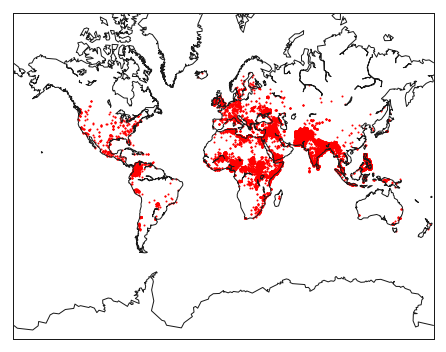

In [293]:
# AFTER 2010

plt.figure(figsize=(12,6))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawmapboundary()
x, y = m(list(df2010["longitude"].astype(float)), list(df2010["latitude"].astype(float)))
m.scatter(x,y,1,marker='o',color='red')

plt.show()

Можем видеть, что регионы с пиковой активностью с точки зрения террактов остались теми же самыми.

Продолжая рассматривать период от 2010 года, посмотрим, где эффективнее всего предотвращались терракты

In [135]:
gb2010=df2010.groupby('country_txt').agg({
    'success':['sum','count']})

In [136]:
gb2010['percent']=gb2010['success']['sum']/gb2010['success']['count']
gb2010.sort_values(['percent'],ascending=False)

success         percent
                             sum count          
country_txt                                     
Latvia                         1     1  1.000000
Croatia                        2     2  1.000000
Eritrea                        1     1  1.000000
Estonia                        3     3  1.000000
Guinea-Bissau                  1     1  1.000000
Haiti                          1     1  1.000000
Iceland                        2     2  1.000000
Japan                         17    17  1.000000
Lesotho                        1     1  1.000000
Macedonia                      9     9  1.000000
Malawi                         1     1  1.000000
Malta                          5     5  1.000000
Montenegro                     3     3  1.000000
Morocco                        2     2  1.000000
New Zealand                    2     2  1.000000
Nicaragua                      2     2  1.000000
Panama                         1     1  1.000000
Portugal                       2     2  1.000000
Qatar                          1     1  1.000000
Republic of the Congo         16    16  1.000000
Senegal                       24    24  1.000000
Serbia                         5     5  1.000000
Sierra Leone                   4     4  1.000000
Slovak Republic                1     1  1.000000
Tajikistan                    14    14  1.000000
Turkmenistan                   1     1  1.000000
Uruguay                        1     1  1.000000
Djibouti                       3     3  1.000000
Zimbabwe                       9     9  1.000000
Austria                        6     6  1.000000
...                          ...   ...       ...
Ecuador                        7    10  0.700000
Italy                         43    63  0.682540
Uganda                        36    53  0.679245
West Bank and Gaza Strip     496   735  0.674830
Israel                       403   600  0.671667
Dominican Republic             2     3  0.666667
Jamaica                        2     3  0.666667
Hungary                        2     3  0.666667
Switzerland                    4     6  0.666667
Kyrgyzstan                     8    13  0.615385
Georgia                       14    23  0.608696
United Kingdom               446   739  0.603518
Norway                         3     5  0.600000
Armenia                        3     5  0.600000
United Arab Emirates           3     5  0.600000
Nepal                        340   579  0.587219
Kuwait                         2     4  0.500000
Albania                        5    10  0.500000
Zambia                         1     2  0.500000
South Korea                    1     2  0.500000
Vietnam                        1     2  0.500000
Taiwan                         2     5  0.400000
Liberia                        1     3  0.333333
Ireland                       37   157  0.235669
Uzbekistan                     0     1  0.000000
Ghana                          0     2  0.000000
Guyana                         0     1  0.000000
Bahamas                        0     1  0.000000
Cambodia                       0     2  0.000000
Moldova                        0     2  0.000000

[148 rows x 3 columns]

Отобразим те страны, где не был успешным ни один готовившийся терракт 

In [137]:
gb2010[gb2010.percent == 1]

success       percent
                          sum count        
country_txt                                
Austria                     6     6     1.0
Belarus                     6     6     1.0
Belize                      1     1     1.0
Bhutan                      2     2     1.0
Bolivia                     1     1     1.0
Croatia                     2     2     1.0
Djibouti                    3     3     1.0
Eritrea                     1     1     1.0
Estonia                     3     3     1.0
Guinea-Bissau               1     1     1.0
Haiti                       1     1     1.0
Iceland                     2     2     1.0
Japan                      17    17     1.0
Latvia                      1     1     1.0
Lesotho                     1     1     1.0
Macedonia                   9     9     1.0
Malawi                      1     1     1.0
Malta                       5     5     1.0
Montenegro                  3     3     1.0
Morocco                     2     2     1.0
New Zealand                 2     2     1.0
Nicaragua                   2     2     1.0
Panama                      1     1     1.0
Portugal                    2     2     1.0
Qatar                       1     1     1.0
Republic of the Congo      16    16     1.0
Senegal                    24    24     1.0
Serbia                      5     5     1.0
Sierra Leone                4     4     1.0
Slovak Republic             1     1     1.0
Tajikistan                 14    14     1.0
Turkmenistan                1     1     1.0
Uruguay                     1     1     1.0
Zimbabwe                    9     9     1.0

Посмотрим теперь, какие страны эффективнее всего предотвращали терракты, помимо тех, что предотвратили все

In [139]:
gb2010[gb2010.percent != 1].sort_values('percent',ascending=False)

success         percent
                                     sum count          
country_txt                                             
Chad                                  39    40  0.975000
Sudan                                721   744  0.969086
Ethiopia                              59    61  0.967213
Syria                               1979  2051  0.964895
Rwanda                                24    25  0.960000
Australia                             35    37  0.945946
Iran                                  77    82  0.939024
Niger                                 88    94  0.936170
Thailand                            2235  2394  0.933584
Burundi                              237   254  0.933071
Finland                               13    14  0.928571
Cameroon                             287   310  0.925806
Central African Republic             242   262  0.923664
France                               196   213  0.920188
Mali                                 470   512  0.917969
Nigeria                             3273  3569  0.917064
Democratic Republic of the Congo     586   640  0.915625
Somalia                             3179  3480  0.913506
Chile                                 60    66  0.909091
China                                 78    86  0.906977
Ukraine                             1507  1674  0.900239
Angola                                 9    10  0.900000
Bangladesh                           828   920  0.900000
Mozambique                           125   139  0.899281
Paraguay                              71    79  0.898734
Myanmar                              259   289  0.896194
South Africa                          87    98  0.887755
Kenya                                498   562  0.886121
Libya                               1974  2233  0.884013
Argentina                             15    17  0.882353
...                                  ...   ...       ...
Ecuador                                7    10  0.700000
Italy                                 43    63  0.682540
Uganda                                36    53  0.679245
West Bank and Gaza Strip             496   735  0.674830
Israel                               403   600  0.671667
Switzerland                            4     6  0.666667
Dominican Republic                     2     3  0.666667
Hungary                                2     3  0.666667
Jamaica                                2     3  0.666667
Kyrgyzstan                             8    13  0.615385
Georgia                               14    23  0.608696
United Kingdom                       446   739  0.603518
United Arab Emirates                   3     5  0.600000
Armenia                                3     5  0.600000
Norway                                 3     5  0.600000
Nepal                                340   579  0.587219
Vietnam                                1     2  0.500000
Zambia                                 1     2  0.500000
South Korea                            1     2  0.500000
Albania                                5    10  0.500000
Kuwait                                 2     4  0.500000
Taiwan                                 2     5  0.400000
Liberia                                1     3  0.333333
Ireland                               37   157  0.235669
Ghana                                  0     2  0.000000
Cambodia                               0     2  0.000000
Guyana                                 0     1  0.000000
Uzbekistan                             0     1  0.000000
Bahamas                                0     1  0.000000
Moldova                                0     2  0.000000

[114 rows x 3 columns]

Посмотрим каких типов террактов было больше всего

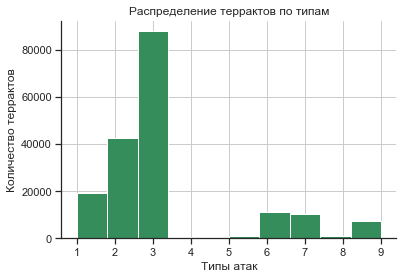

In [159]:
clmn = df['attacktype1']
fig, ax= plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(clmn,facecolor='#368d5c')

plt.xlabel('Типы атак')
plt.ylabel('Количество террактов')
plt.title(r'Распределение террактов по типам')
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

In [160]:
df[['attacktype1','attacktype1_txt']].drop_duplicates()

,attacktype1,attacktype1_txt
0,1,Assassination
5,2,Armed Assault
7,3,Bombing/Explosion
8,7,Facility/Infrastructure Attack
12,4,Hijacking
16,9,Unknown
27,6,Hostage Taking (Kidnapping)
298,8,Unarmed Assault
336,5,Hostage Taking (Barricade Incident)


In [161]:
# Whole period
df.groupby(['attacktype1_txt']).agg({'eventid':'count','success':'sum'}).sort_values('success',ascending=False)

,eventid,success
attacktype1_txt,,
Bombing/Explosion,87931,77245
Armed Assault,42548,40224
Assassination,19191,14515
Hostage Taking (Kidnapping),11015,10767
Facility/Infrastructure Attack,10275,9702
Unknown,7193,5936
Hostage Taking (Barricade Incident),985,977
Unarmed Assault,1007,874
Hijacking,655,577


In [162]:
# 2010 and after
df2010.groupby(['attacktype1_txt']).agg({'eventid':'count','success':'sum'}).sort_values('success',ascending=False)

,eventid,success
attacktype1_txt,,
Bombing/Explosion,45434,38491
Armed Assault,20078,18326
Hostage Taking (Kidnapping),6313,6200
Facility/Infrastructure Attack,4333,4170
Assassination,5499,3194
Unknown,4078,2997
Unarmed Assault,428,393
Hostage Taking (Barricade Incident),325,322
Hijacking,232,211


Как видно из данных, больше всего было совершено террактов, подразумевающих взрыв, примерно в 2 раза меньше вооруженных нападений.

Рассмотрим теперь типы атак в совокупности: по оси OX - вооруженные нападения, OY - атака инфраструктуры или какого-то объекта. Размер круга передает суммарное количество террактов в стране, цвет - количество наиболее частой по миру атаки со взрывом.

In [282]:
pivo=pd.pivot_table(df, values='success', index=['country_txt'], columns=['attacktype1_txt'],aggfunc=np.sum).fillna(0)
pivo['sum']=pivo.sum(axis=1)

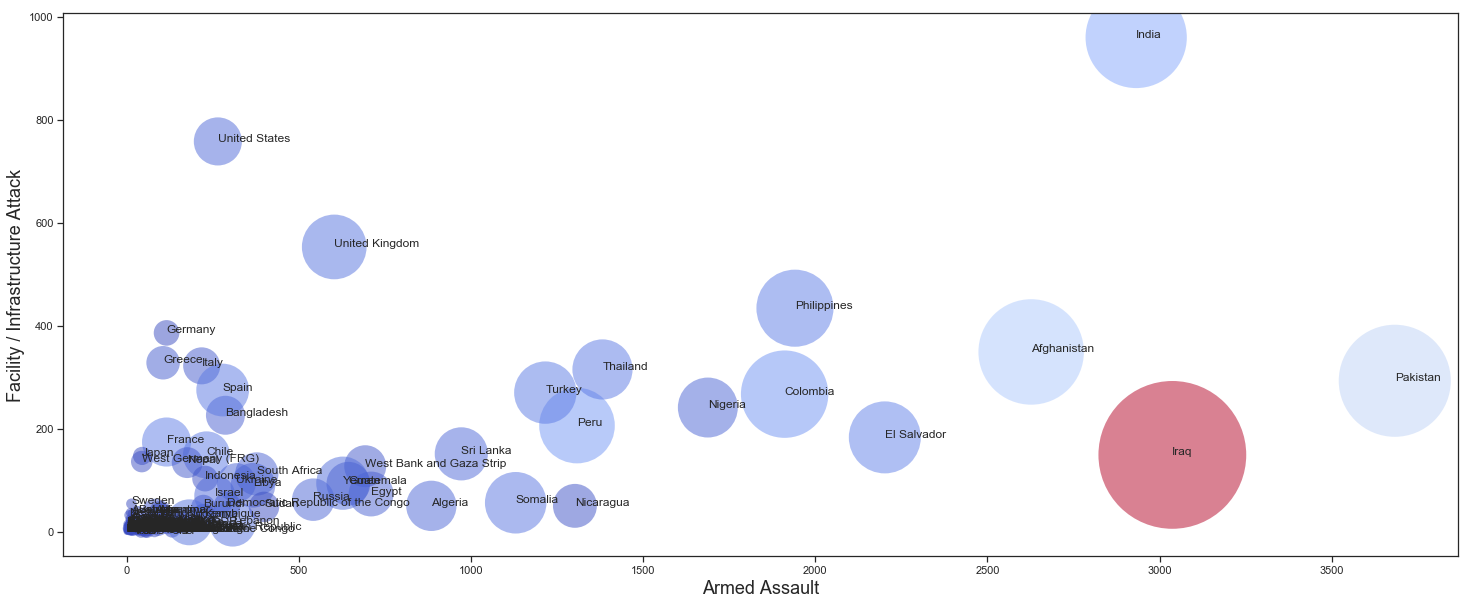

In [289]:
fig, ax = plt.subplots(1,1, figsize = (25,10))

x = np.array(pivo['Armed Assault'].reset_index().drop(columns='country_txt'))
y = np.array(pivo['Facility/Infrastructure Attack'].reset_index().drop(columns='country_txt'))
area = np.array(pivo['sum'].reset_index().drop(columns='country_txt'))
colours = np.array(pivo['Bombing/Explosion'].reset_index().drop(columns='country_txt'))
text = np.array(pivo.index.get_level_values(0))
 
ax.scatter(x, y, s = area, c = colours, cmap=plt.cm.coolwarm, alpha = 0.5, linewidth = 0)

ax.set_xlabel('Armed Assault', fontsize = 18)
ax.set_ylabel('Facility / Infrastructure Attack', fontsize = 18)

for i, country in enumerate(text):
    ax.annotate(country, (x[i],y[i]), fontsize = 12) 

Вывод: наиболее безопасная обстановка на текущий момент наблюдается в северной части Северной Америки, Евразии, а также в Австралии и Гренландии.